<a href="https://colab.research.google.com/github/dubussy/insideout/blob/main/1%EC%9B%9412%EC%9D%BC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()
#실행 후 런타임 - 런타임 다시 시작하기

<2020년 12월 전국 **읍면동** 남녀 0세~100세 이상 연령별 인구 데이터 사용>

# 1. 우리 동네 인구피라미드 그래프 그리기

In [ ]:
from google.colab import files 
uploaded = files.upload()
#'202012town'파일 선택하기

Saving 202012town.csv to 202012town.csv


원하는 동네명을 입력해주세요:방배3동


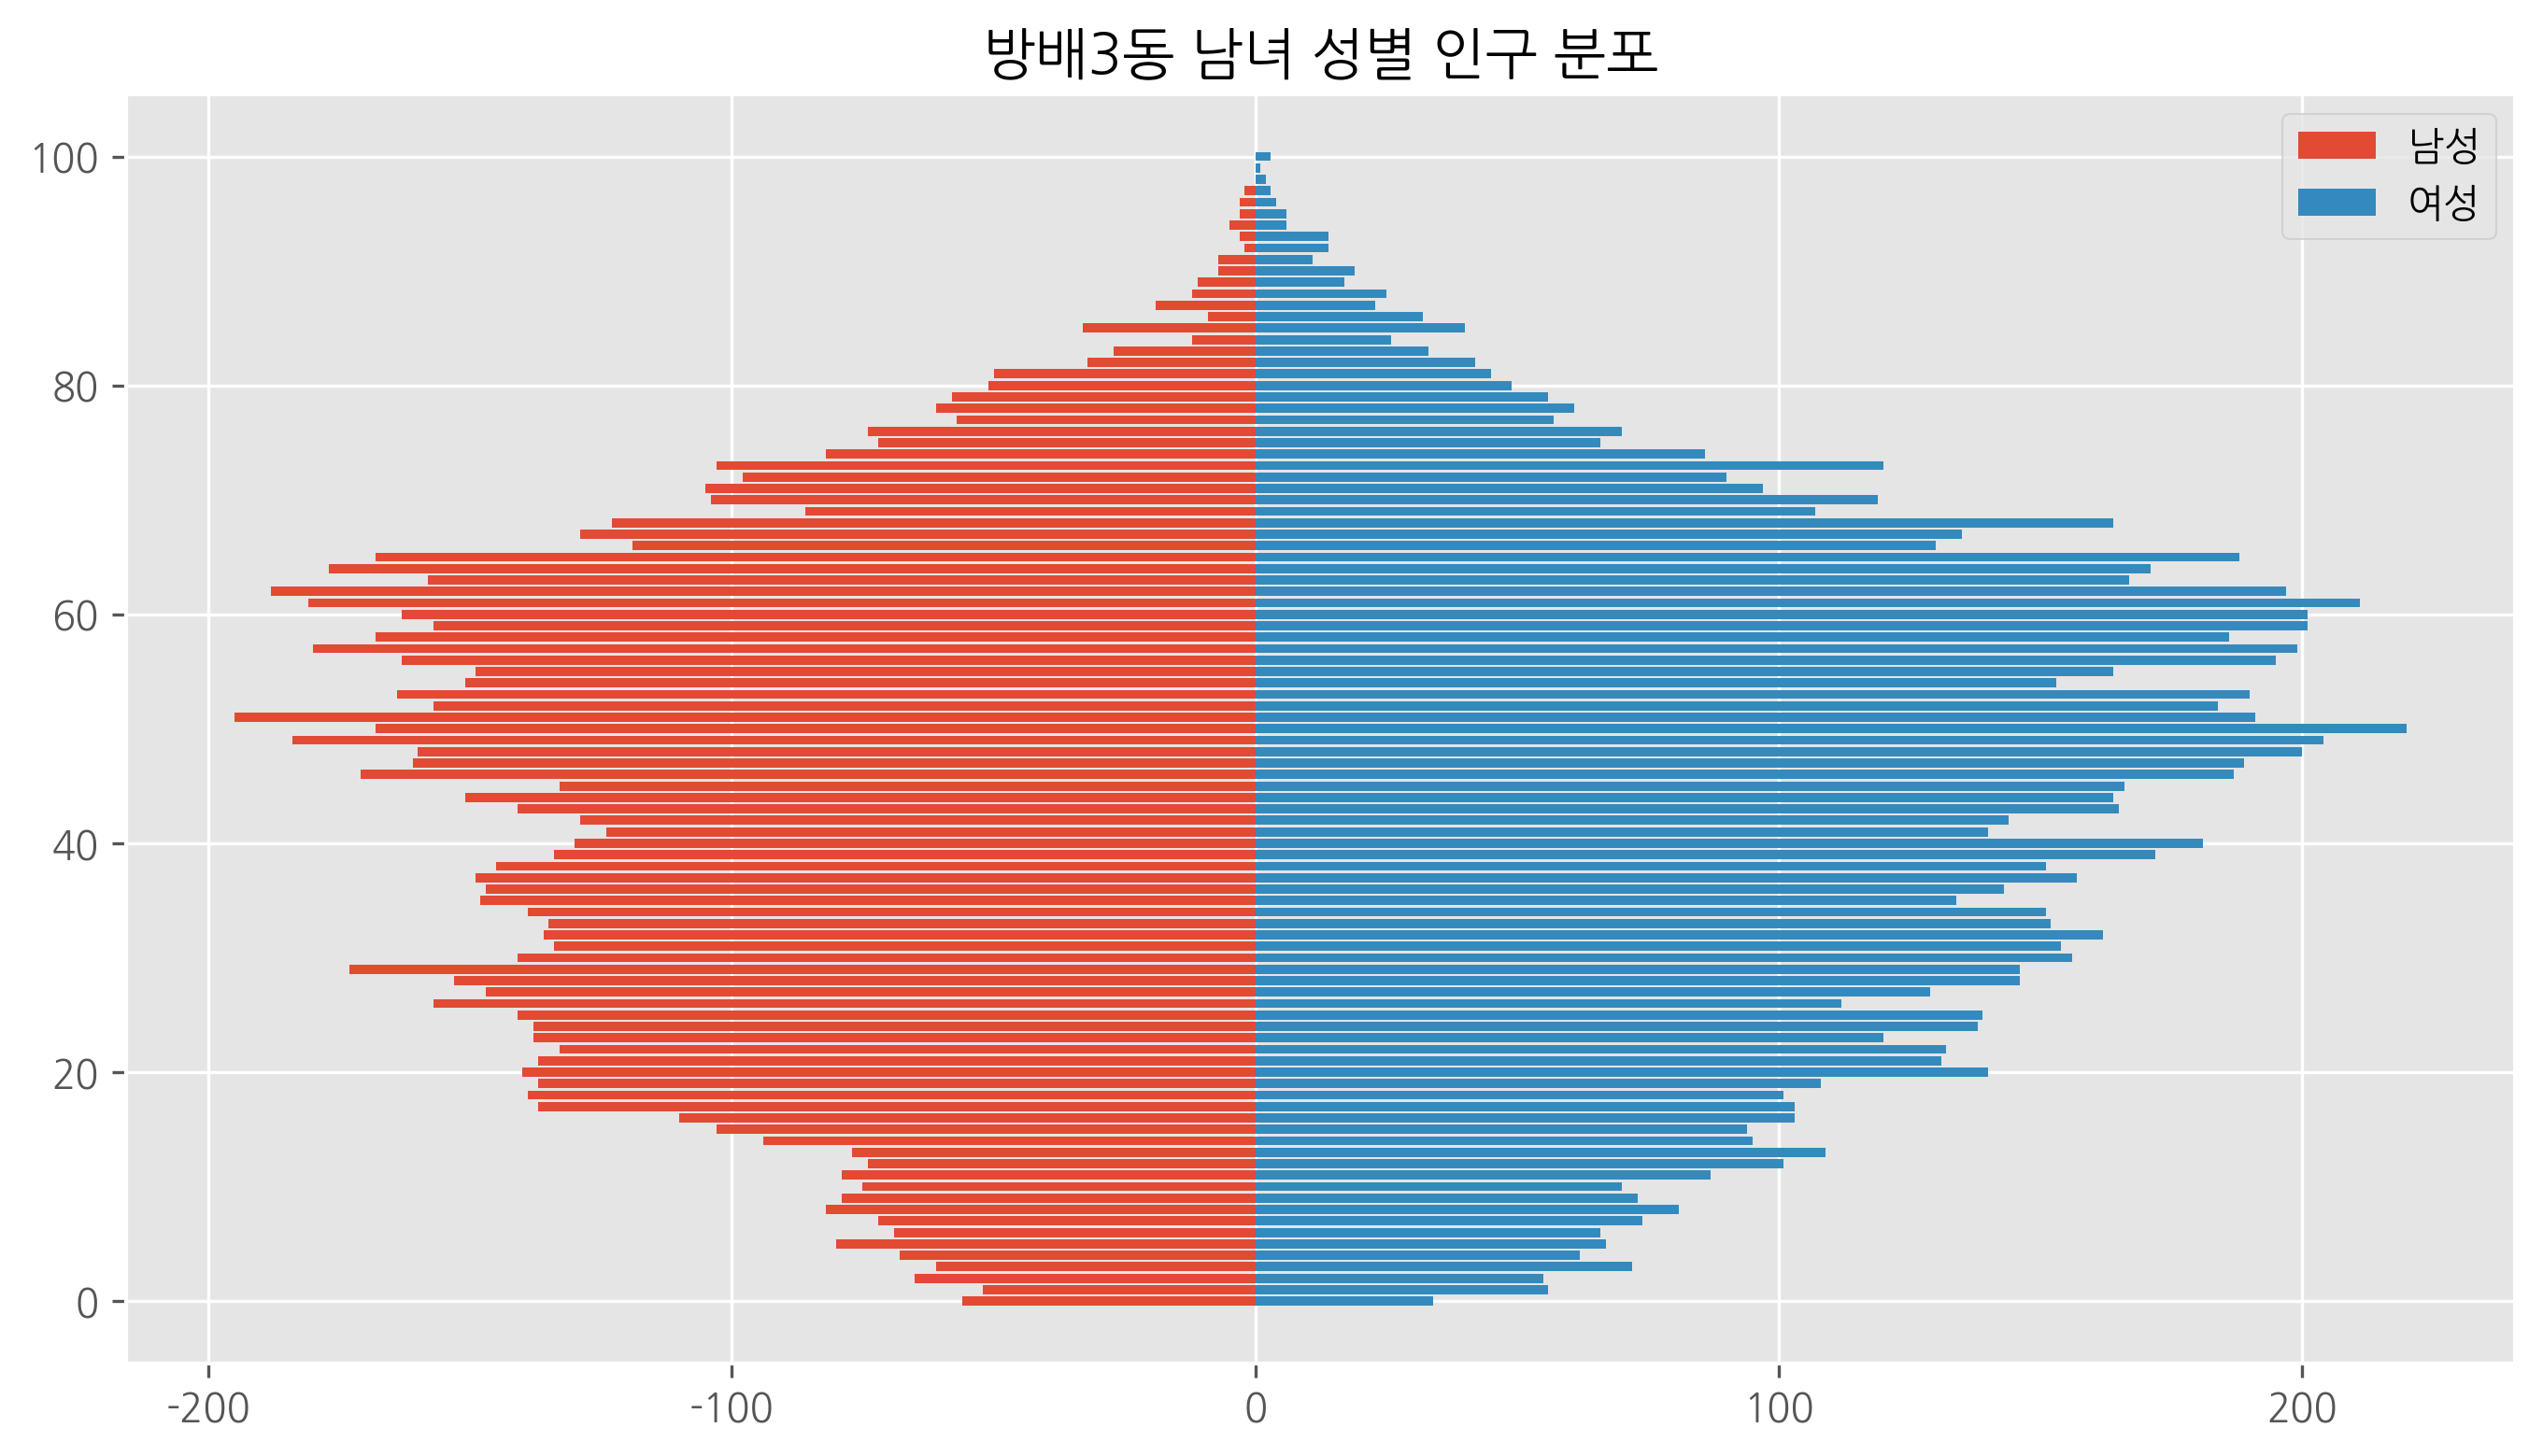

In [ ]:
#2020년 동네 인구피라미드 그래프 (학생들이 사는 동네 관심 유발하기)
import csv
f=open('202012town.csv', encoding = 'cp949')
data=csv.reader(f)
m=[]
f=[]
name=input('원하는 동네명을 입력해주세요:')   
for row in data:
    if name in row[0]:
        for i in range(0,101):
            m.append(-int(row[i+3].replace(',','')))
            f.append(int(row[-(i+1)].replace(',','')))
f.reverse()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=300)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus']=False
plt.title(name+' 남녀 성별 인구 분포(2020년)')
plt.barh(range(101),m, label='남성')
plt.barh(range(101),f,label='여성')
plt.legend()
plt.show()

#2. 2010년 인구 피라미드 그래프 (10년 전과 비교해보기)

<2010년 전국 **읍면동** 남녀 1세~100세 이상 연령별 인구 데이터 사용>

In [ ]:
from google.colab import files 
uploaded = files.upload()
#'2010town' 파일 선택하기

Saving 2010town.csv to 2010town.csv


원하는 동네명을 입력해주세요:등촌제3동


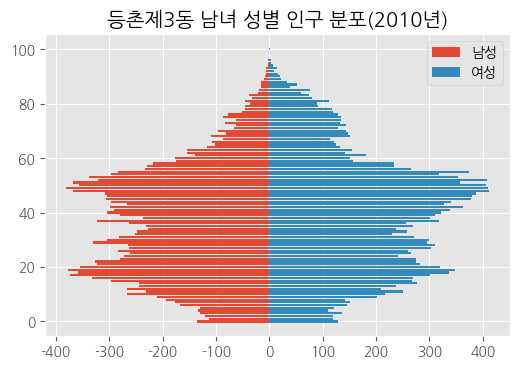

In [ ]:
# 2010년 우리 동네 인구피라미드 그래프 (저출산 고령화)
import csv
f=open('2010town.csv', encoding = 'cp949')
data=csv.reader(f)
m=[]
f=[]
name=input('원하는 동네명을 입력해주세요:')   
for row in data:
    if name in row[0]:
        for i in range(0,101):
            m.append(-int(row[i+3].replace(',','')))
            f.append(int(row[-(i+1)].replace(',','')))
f.reverse()

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=100)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus']=False
plt.title(name+' 남녀 성별 인구 분포(2010년)')
plt.barh(range(101),m, label='남성')
plt.barh(range(101),f,label='여성')
plt.legend()
plt.show()

<2020년 전국 **읍면동** 0세~100세 이상 연령별 인구 데이터 사용> -남녀구분X 총합

#3. 우리 동네의 저출산 고령화 알아보기(연령별 인구 구성 원그래프 그려보기)

In [ ]:
from google.colab import files 
uploaded = files.upload()
#'2020age' 파일 선택하기

Saving 2020age.csv to 2020age (1).csv


알고 싶은 동네를 입력해주세요:목5동


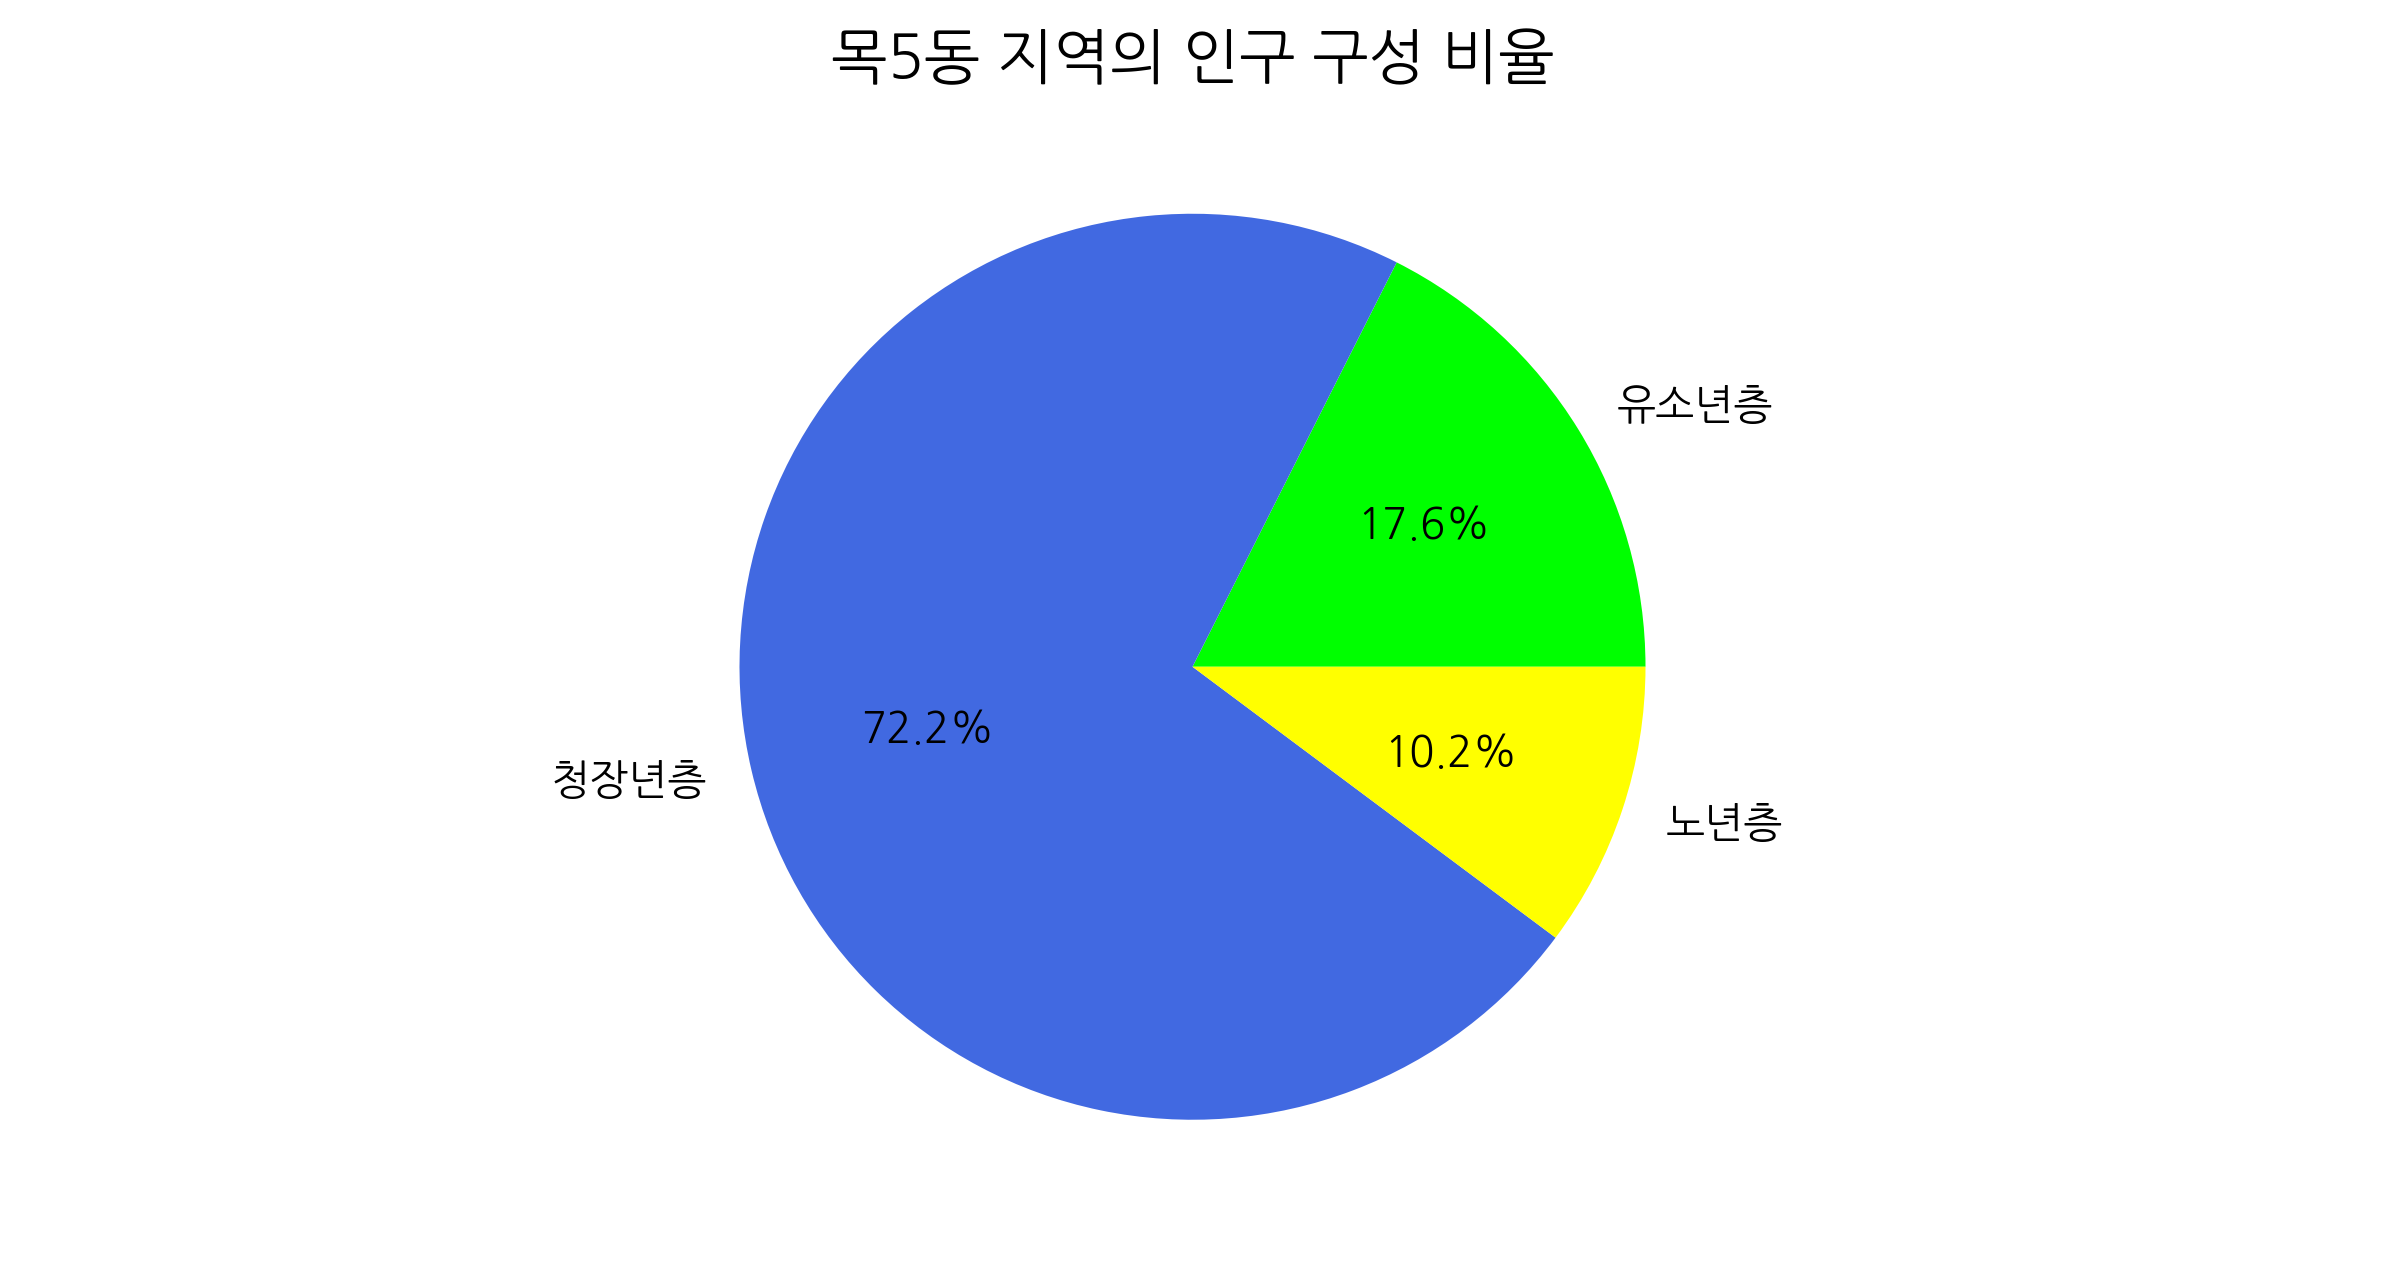

*기준: 노년층 비율 7%이상 - 고령화 사회, 14%이상- 고령 사회, 20%이상- 초고령 사회


In [ ]:
# 우리 동네의 저출산 고령화 알아보기(연령별 인구 구성 원그래프 그려보기)
import csv
f=open('2020age.csv', encoding = 'cp949')
data=csv.reader(f)
ch=0
ad=0
se=0
size=[]

name=input('알고 싶은 동네를 입력해주세요:')

for row in data:
    if name in row[0]:
        for i in range(3,18):
            ch += int(row[i].replace(',',''))
        for i in range(18,68):
            ad += int(row[i].replace(',',''))
        for i in range(68,104):
            se += int(row[i].replace(',',''))
size.append(ch)
size.append(ad)
size.append(se)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=300)
plt.rc('font', family='NanumGothic')
color=['lime','royalblue','yellow']
plt.axis('equal')

plt.pie(size, labels=['유소년층','청장년층','노년층'], autopct='%.1f%%', colors=color)
plt.title(name+' 지역의 인구 구성 비율')
plt.show()
print('*기준: 노년층 비율 7%이상 - 고령화 사회, 14%이상- 고령 사회, 20%이상- 초고령 사회')

<2016 - 2020년 **서울 자치구별** 만7세~12세(초등학생) 인구 합계 데이터 사용> 

#4. 우리 동네(구)의 초등학생은 정말 감소했을까?(꺾은선 그래프)

In [ ]:
from google.colab import files 
uploaded = files.upload()
#'elementary' 파일 선택하기

In [ ]:
#(심화)우리 동네(구)의 초등학생은 정말 감소했을까?(꺾은선 그래프)
import csv
f=open('elementary.csv', encoding='cp949')
data=csv.reader(f)
name=input('알고싶은 구 이름을 입력하세요:')
result=[]
gap=0

for row in data:
    if name in row[0]:
        for i in row[1:]:
            result.append(int(i.replace(',','')))
        gap=int(row[-1].replace(',',''))-int(row[1].replace(',',''))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font',family='NanumGothic')
plt.title(name+' 지역의 최근 5년간 초등학생수 변화')
plt.xticks(range(5),['2016','2017','2018','2019','2020'])
plt.xlabel('연도')
plt.ylabel('학생수')
plt.plot(result)
plt.show()
print('학생수 차이(명):',gap)

In [ ]:
#최근 5년간 초등학생 인구가 가장 감소한 구는?(꺾은선 그래프)-Flourish로 비교 

https://public.flourish.studio/visualisation/4835652/
